## Principal Component Analysis
- I standardization
- II covariance matrix
- III Eigen
- IV largest possibile variance 
- V featrue vector

In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

## DATA creation

In [2]:
genes = [''.join(['gene', str(i)]) for i in range(1, 101)]
wt = [''.join(['wt', str(i)]) for i in range(1, 6)]
ko = [''.join(['ko', str(i)]) for i in range(1, 6)]

In [3]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)

In [4]:
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
gene96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for gene in data.index:
    data.loc[gene, 'wt1': 'wt5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    data.loc[gene, 'ko1': 'ko5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)

In [6]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,914,793,818,886,782,236,224,247,250,268
gene2,856,872,843,857,927,13,18,18,25,21
gene3,793,818,810,792,853,411,450,403,455,462
gene4,302,287,267,295,284,353,314,334,329,368
gene5,637,612,586,622,664,534,544,522,517,546


## Scale data

In [7]:
scale_data = preprocessing.scale(data.T)

In [8]:
scale_data

array([[ 1.24369558,  0.96361596,  0.88610359, -0.3685634 ,  1.17189688,
        -1.0330749 , -1.01533017,  0.34270387, -1.09180835, -1.56138848,
         1.02259228, -1.02495875, -0.48805809, -0.98789021, -0.67974084,
         0.58894702,  0.76848426,  0.95287319, -0.96611002,  0.27564729,
         0.97300261,  1.24473093,  0.97438915,  0.91170991,  0.78581662,
        -1.00345709, -1.13774892, -0.9629136 ,  0.99529973,  1.09633063,
        -1.01795568, -1.14585933, -1.24093088,  1.18380629,  1.07361762,
         0.82498286, -1.06402555, -1.01913071,  0.81261447, -1.15419426,
         1.05411625, -0.54354761,  0.77623289,  0.89598281,  0.87955673,
        -0.93301301, -1.02001019, -1.18578086, -0.75421187,  0.72500075,
         0.92869321, -0.97895531, -0.83109651, -0.9364363 , -0.95188362,
        -0.60536008, -1.05534077, -1.05883517,  0.83837423,  0.83755222,
         0.63797652, -0.95472738,  0.89594243, -1.07811156,  0.76358015,
         0.97034747,  0.94764618,  0.93449036, -1.0

## PCA in sklearn
- center and scale

In [9]:
pca = PCA()

In [10]:
pca.fit(scale_data)

PCA()

In [11]:
pca_data = pca.transform(scale_data)

In [12]:
pca_data

array([[ 9.57210370e+00, -1.06948769e-01, -8.64087643e-01,
         1.20258521e-02,  2.10602430e-01,  9.51179305e-02,
         1.27099603e+00,  1.43899589e+00, -2.34286124e-01,
         4.37150316e-15],
       [ 9.07369000e+00, -8.52522234e-01,  8.73054843e-01,
        -1.89370785e+00, -6.51433668e-01,  4.26944731e-01,
        -1.02808911e+00,  4.06863366e-01,  7.83029698e-01,
         3.80598331e-15],
       [ 9.38390347e+00, -7.70291943e-02, -5.84712273e-01,
        -1.18080274e+00, -1.43821228e+00, -4.93558606e-01,
         6.96240364e-01, -1.18004196e+00, -5.04090552e-01,
         2.51187959e-15],
       [ 9.51632533e+00,  3.01552234e+00, -1.17847091e+00,
         5.25717049e-01,  1.47138232e+00,  1.99119909e-01,
        -7.78625394e-01, -3.61232324e-01,  7.26842807e-02,
         1.23512311e-15],
       [ 1.02087235e+01, -1.82866246e+00,  1.76064467e+00,
         2.42739570e+00,  2.99992818e-01, -2.06040326e-01,
        -1.71309083e-01, -2.85678339e-01, -9.63698757e-02,
         2.

## Scree plot 

In [13]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

In [14]:
per_var

array([91.3,  2.4,  1.5,  1.5,  1.2,  0.7,  0.6,  0.4,  0.3,  0. ])

In [15]:
labels = [''.join(['PC', str(x)]) for x in range(1, len(per_var)+1)]

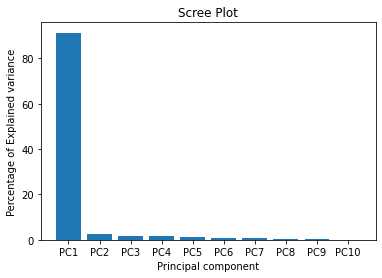

In [16]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained variance')
plt.xlabel('Principal component')
plt.title('Scree Plot');

### PCA dataframe

In [17]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

In [18]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,9.572104,-0.106949,-0.864088,0.012026,0.210602,0.095118,1.270996,1.438996,-0.234286,4.371503e-15
wt2,9.073690,-0.852522,0.873055,-1.893708,-0.651434,0.426945,-1.028089,0.406863,0.783030,3.805983e-15
wt3,9.383903,-0.077029,-0.584712,-1.180803,-1.438212,-0.493559,0.696240,-1.180042,-0.504091,2.511880e-15
wt4,9.516325,3.015522,-1.178471,0.525717,1.471382,0.199120,-0.778625,-0.361232,0.072684,1.235123e-15
wt5,10.208723,-1.828662,1.760645,2.427396,0.299993,-0.206040,-0.171309,-0.285678,-0.096370,2.706169e-15
ko1,-9.582172,0.142732,0.524147,0.026268,0.477979,1.651861,1.146294,-0.584384,0.515732,-7.147061e-16
ko2,-9.401983,-1.627818,-1.753131,0.527954,-0.655580,0.949694,-1.033746,0.151471,-0.615870,-3.969047e-15
ko3,-9.807024,0.978712,-0.689606,1.257248,-1.506504,-1.172285,0.094095,0.173143,0.804614,-3.393119e-15
ko4,-9.081568,-1.707768,-0.312929,-1.136779,2.092191,-1.275506,0.049440,-0.169741,0.041948,-1.491862e-15
ko5,-9.881999,2.063782,2.225090,-0.565320,-0.300419,-0.175347,-0.245295,0.410604,-0.767392,-1.845746e-15


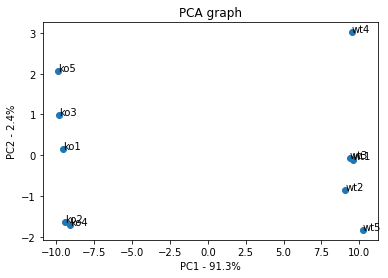

In [19]:
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('PCA graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
for sample in pca_df.index:
    plt.annotate(sample, (pca_df['PC1'].loc[sample], pca_df['PC2'].loc[sample]))

In [20]:
loading_scores = pd.Series(pca.components_[0], index=genes)

In [21]:
loading_scores

gene1      0.103636
gene2      0.104559
gene3      0.103995
gene4     -0.090268
gene5      0.096468
             ...   
gene96    -0.103932
gene97     0.104061
gene98     0.092877
gene99     0.104400
gene100    0.103286
Length: 100, dtype: float64

In [22]:
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

In [23]:
top_10_genes = sorted_loading_scores[0: 10].index.values

In [24]:
top_10_genes

array(['gene52', 'gene28', 'gene2', 'gene80', 'gene90', 'gene21',
       'gene51', 'gene35', 'gene11', 'gene87'], dtype=object)

In [25]:
loading_scores[top_10_genes]

gene52   -0.104568
gene28   -0.104563
gene2     0.104559
gene80    0.104557
gene90   -0.104552
gene21    0.104550
gene51    0.104544
gene35    0.104541
gene11    0.104540
gene87   -0.104537
dtype: float64